# Hidden Markov Model
![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/participantstaskb/Participant2.csv
/kaggle/input/participantstaskb/Participant17.csv
/kaggle/input/participantstaskb/Participant22.csv
/kaggle/input/participantstaskb/Participant18.csv
/kaggle/input/participantstaskb/Participant5.csv
/kaggle/input/participantstaskb/Participant3.csv
/kaggle/input/participantstaskb/Participant25.csv
/kaggle/input/participantstaskb/Participant4.csv
/kaggle/input/participantstaskb/Participant7.csv
/kaggle/input/participantstaskb/Participant15.csv
/kaggle/input/participantstaskb/Participant9.csv
/kaggle/input/participantstaskb/Participant14.csv
/kaggle/input/participantstaskb/Participant30.csv
/kaggle/input/participantstaskb/Participant20.csv
/kaggle/input/participantstaskb/Participant10.csv
/kaggle/input/participantstaskb/Participant27.csv
/kaggle/input/participantstaskb/Participant13.csv
/kaggle/input/participantstaskb/Participant1.csv
/kaggle/input/participantstaskb/Participant29.csv
/kaggle/input/participantstaskb/Participant19.csv
/kaggle

In [2]:
pip install cr-features

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 74.9/74.9 kB 811.8 kB/s eta 0:00:00a 0:00:01
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 6.6 MB/s eta 0:00:0000:0100:01
  Preparing metadata (setup.py) ... done
  Created wheel for cr-features: filename=cr_features-0.1.7-py3-none-any.whl size=80471 sha256=8fe3741d7c56907e33c9c4a8b1d52776ae4ac4a37dca632db17e1164d8f4f59d
  Stored in directory: /root/.cache/pip/wheels/1c/01/7c/3ec5b298ec711e408fa1829be8cbb5a1ae762add0cb4e8c8c6
  Created wheel for biosppy: filename=biosppy-0.8.0-py2.py3-none-any.whl size=100176 sha256=eaa9d3766047843ac9e534e3d5781f106bbe2273359eb9816a1f8db38ae314fd
  Stored in directory: /root/.cache/pip/wheels/32/17/9d/77adbf0db713546eaa1c7a1480b2dce91fa724a133115dc20c
Successfully built cr-features biosppy
Note: you may need to restart the kernel to use updated packages.


In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import tree

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from numpy import set_printoptions

from sklearn.dummy import DummyClassifier
from sklearn.metrics import f1_score
from sklearn.metrics import plot_confusion_matrix

from sklearn.ensemble import RandomForestClassifier

from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import DistanceMetric
from sklearn.metrics import RocCurveDisplay
from cr_features.pipeline_functions import hmm_smooth, three_step_fs
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score

%matplotlib inline

In [4]:
DF_listA= list()
DF_listB = list()

In [5]:
#Task A
for i in range (0, 30):
    DF_listA.insert(i, pd.read_csv('../input/participantstaska/Participant'+str(i+1)+'.csv') )

#Task B
for i in range (0, 30):
    DF_listB.insert(i, pd.read_csv('../input/participantstaskb/Participant'+str(i+1)+'.csv') )

In [6]:
training_subjects = np.array([1, 4, 5, 7, 9, 10, 11, 14, 2, 16, 17, 19, 21, 22, 23, 24, 26, 27, 29, 30])
validation_subjects = np.array([3, 6, 12, 20, 25])
test_subjects = np.array([15,8,13,18,28])

In [7]:
#Task A
DF_train = list()
DF_validation = list()
DF_test = list()

#Task B
DF_trainB = list()
DF_validationB = list()
DF_testB = list()
k=0

In [8]:
#Task A
k=0

for i in training_subjects:
    DF_train.insert(k, DF_listA[i-1])
    k=k+1

#Task B
k=0

for i in training_subjects:
    DF_trainB.insert(k, DF_listB[i-1])
    k=k+1

In [9]:
#Task A
k=0
for i in validation_subjects:
    DF_validation.insert(k, DF_listA[i-1])
    k=k+1

#Task B
k=0
for i in validation_subjects:
    DF_validationB.insert(k, DF_listB[i-1])
    k=k+1

In [10]:
#Task A
k=0
for i in test_subjects:
    DF_test.insert(k, DF_listA[i-1])
    k=k+1

#Task B
k=0
for i in test_subjects:
    DF_testB.insert(k, DF_listB[i-1])
    k=k+1

In [11]:
#Task A
trainData = pd.concat(DF_train, ignore_index=True)
validData = pd.concat(DF_validation, ignore_index=True)
testData = pd.concat (DF_test, ignore_index=True)

X_train = trainData.drop(['event'], axis=1)
y_train = pd.DataFrame(trainData.iloc[:,-1])

X_valid = validData.drop(['event'], axis=1)
y_valid = pd.DataFrame(validData.iloc[:,-1])

X_test = testData.drop(['event'], axis=1)
y_test = pd.DataFrame(testData.iloc[:,-1])



#Task B
trainDataB = pd.concat(DF_trainB, ignore_index=True)
validDataB = pd.concat(DF_validationB, ignore_index=True)
testDataB = pd.concat (DF_testB, ignore_index=True)

X_trainB = trainDataB.drop(['event'], axis=1)
y_trainB = pd.DataFrame(trainDataB.iloc[:,-1])

X_validB = validDataB.drop(['event'], axis=1)
y_validB = pd.DataFrame(validDataB.iloc[:,-1])

X_testB = testDataB.drop(['event'], axis=1)
y_testB = pd.DataFrame(testDataB.iloc[:,-1])

In [12]:
from sklearn.preprocessing import StandardScaler
DF_listAstd = list()

In [13]:
for i in range (0, 30):
    DF_listAstd.insert (i, DF_listA[i].drop(['event'], axis=1))

In [14]:
names= DF_listAstd[1].columns

In [15]:
scale= StandardScaler()
for i in range (0, 30):
    DF_listAstd[i]=scale.fit_transform(DF_listAstd[i])
    DF_listAstd[i]=pd.DataFrame(DF_listAstd[i], columns=names)

In [16]:
DF_train_std = list()
DF_valid_std = list()
DF_test_std = list()

In [17]:
k=0

for i in training_subjects:
    DF_train_std.insert(k, DF_listAstd[i-1])
    k=k+1

k=0
    
for i in validation_subjects:
    DF_valid_std.insert(k, DF_listAstd[i-1])
    k=k+1
k=0

for i in test_subjects:
    DF_test_std.insert(k, DF_listAstd[i-1])
    k=k+1

In [18]:
X_train_std = pd.concat(DF_train_std, ignore_index=True)
X_valid_std = pd.concat(DF_valid_std, ignore_index=True)
X_test_std = pd.concat (DF_test_std, ignore_index=True)

In [19]:
X_train=X_train_std
X_valid=X_valid_std
X_test=X_test_std

# Best Model - Oversampling + Std

In [20]:
from imblearn.over_sampling import SMOTE

In [ ]:
y_train.value_counts()

In [23]:
dict_os = {
  "eyebrow_raise": 48834,
  "frown": 44230,
  "neutral": 51773 ,
  "smile": 42374 ,
  "squeeze_eyes": 43423 
}

In [ ]:
oversample = SMOTE(sampling_strategy=dict_os, k_neighbors=5, random_state=42)

In [ ]:
X_train_us, y_train_us = oversample.fit_resample(X_train, y_train)

In [ ]:
y_train_us.value_counts()

In [ ]:
clf_rf_us = RandomForestClassifier(n_estimators=100, random_state=42)
clf_rf_us.fit(X_train_us, y_train_us)

In [ ]:
y_trainSqueezed = y_train.squeeze()

In [ ]:
predictionsValid = clf_rf_us.predict(X_valid)
score_rf_us = clf_rf_us.score(X_valid, y_valid)
f1_rf_us = f1_score(y_valid, predictionsValid, average='macro')
cf = confusion_matrix(y_valid, predictionsValid, labels = y_trainSqueezed.unique())
print ('Accuracy: '+str(score_rf_us*100)+' %')
print ('F1-Score: '+str(f1_rf_us))

In [ ]:
plot_confusion_matrix(estimator=clf_rf_us, X=X_valid, y_true=y_valid,
                      normalize='true', cmap='Blues')

In [ ]:
smoothed_predictionValid = hmm_smooth(y_trainSqueezed, cf, predictionsValid, activities = list(y_trainSqueezed.unique()))

In [ ]:
score_rf_us = accuracy_score(y_valid, smoothed_predictionValid)
f1_rf_us = f1_score(y_valid, smoothed_predictionValid, average='macro')
cf = confusion_matrix(y_valid, smoothed_predictionValid, labels = y_trainSqueezed.unique())
print ('Accuracy: '+str(score_rf_us*100)+' %')
print ('F1-Score: '+str(f1_rf_us))

In [ ]:
predictionsTest = clf_rf_us.predict(X_test)
score_rf_us = clf_rf_us.score(X_test, y_test)
f1_rf_us = f1_score(y_test, predictionsTest, average='macro')
cf = confusion_matrix(y_test, predictionsTest, labels = y_trainSqueezed.unique())
print ('Accuracy: '+str(score_rf_us*100)+' %')
print ('F1-Score: '+str(f1_rf_us))

In [ ]:
plot_confusion_matrix(estimator=clf_rf_us, X=X_test, y_true=y_test,
                      normalize='true', cmap='Blues')

In [ ]:
smoothed_predictionTest = hmm_smooth(y_trainSqueezed, cf, predictionsTest, activities = list(y_trainSqueezed.unique()))

In [ ]:
score_rf_us = accuracy_score(y_test, smoothed_predictionTest)
f1_rf_us = f1_score(y_test, smoothed_predictionTest, average='macro')
cf = confusion_matrix(y_test, smoothed_predictionTest, labels = y_trainSqueezed.unique())
print ('Accuracy: '+str(score_rf_us*100)+' %')
print ('F1-Score: '+str(f1_rf_us))

# Kernel Trick

<br>

In [24]:
oversample3 = SMOTE(sampling_strategy=dict_os, k_neighbors=5, random_state=1)

In [25]:
 X_train_us, y_train_us = oversample3.fit_resample(X_train, y_train)

In [26]:
clf_rf_us = RandomForestClassifier(n_estimators=100, random_state=42)
clf_rf_us.fit(X_train_us, y_train_us)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


RandomForestClassifier(random_state=42)

In [27]:
y_trainSqueezed = y_train.squeeze()

In [28]:
predictionsValid = clf_rf_us.predict(X_valid)
score_rf_us = clf_rf_us.score(X_valid, y_valid)
f1_rf_us = f1_score(y_valid, predictionsValid, average='macro')
cf = confusion_matrix(y_valid, predictionsValid, labels = y_trainSqueezed.unique())
print ('Accuracy: '+str(score_rf_us*100)+' %')
print ('F1-Score: '+str(f1_rf_us))

Accuracy: 85.9315977539561 %
F1-Score: 0.7676022682352842


/opt/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


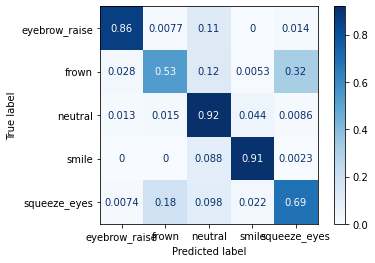

In [29]:
plot_confusion_matrix(estimator=clf_rf_us, X=X_valid, y_true=y_valid,
                      normalize='true', cmap='Blues')

In [30]:
smoothed_predictionValid = hmm_smooth(y_trainSqueezed, cf, predictionsValid, activities = list(y_trainSqueezed.unique()))

In [31]:
score_rf_us = accuracy_score(y_valid, smoothed_predictionValid)
f1_rf_us = f1_score(y_valid, smoothed_predictionValid, average='macro')
cf = confusion_matrix(y_valid, smoothed_predictionValid, labels = y_trainSqueezed.unique())
print ('Accuracy: '+str(score_rf_us*100)+' %')
print ('F1-Score: '+str(f1_rf_us))

Accuracy: 86.49821337417049 %
F1-Score: 0.7803386059758607


In [32]:
predictionsTest = clf_rf_us.predict(X_test)
score_rf_us = clf_rf_us.score(X_test, y_test)
f1_rf_us = f1_score(y_test, predictionsTest, average='macro')
cf = confusion_matrix(y_test, predictionsTest, labels = y_trainSqueezed.unique())
print ('Accuracy: '+str(score_rf_us*100)+' %')
print ('F1-Score: '+str(f1_rf_us))

Accuracy: 88.66871479774706 %
F1-Score: 0.8434828081060498


/opt/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


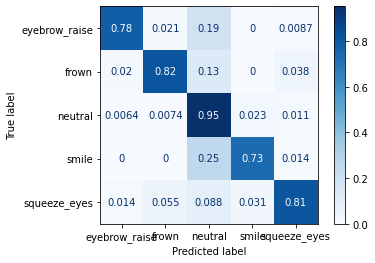

In [33]:
plot_confusion_matrix(estimator=clf_rf_us, X=X_test, y_true=y_test,
                      normalize='true', cmap='Blues')

In [34]:
smoothed_predictionTest = hmm_smooth(y_trainSqueezed, cf, predictionsTest, activities = list(y_trainSqueezed.unique()))

In [35]:
score_rf_us = accuracy_score(y_test, smoothed_predictionTest)
f1_rf_us = f1_score(y_test, smoothed_predictionTest, average='macro')
cf = confusion_matrix(y_test, smoothed_predictionTest, labels = y_trainSqueezed.unique())
print ('Accuracy: '+str(score_rf_us*100)+' %')
print ('F1-Score: '+str(f1_rf_us))

Accuracy: 89.47772657450076 %
F1-Score: 0.8608668026896484


In [38]:
cf

array([[11292,   296,    61,    70,   172],
       [  471,  1500,     0,     0,    27],
       [  258,     0,  1670,    19,    47],
       [  343,     0,    23,  1473,     5],
       [  158,     9,    80,    16,  1540]])

In [40]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

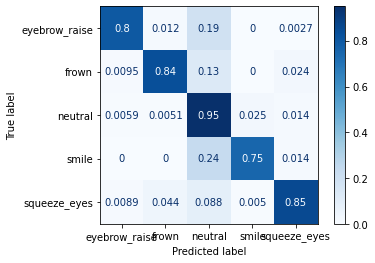

In [46]:
ConfusionMatrixDisplay.from_predictions(y_test, smoothed_predictionTest, normalize='true', cmap='Blues')

# Task B

In [12]:
from sklearn.preprocessing import StandardScaler
DF_listBstd = list()

In [13]:
for i in range (0, 30):
    DF_listBstd.insert (i, DF_listB[i].drop(['event'], axis=1))

In [14]:
names= DF_listBstd[1].columns

In [15]:
scale= StandardScaler()
for i in range (0, 30):
    DF_listBstd[i]=scale.fit_transform(DF_listBstd[i])
    DF_listBstd[i]=pd.DataFrame(DF_listBstd[i], columns=names)

In [16]:
DF_trainB_std = list()
DF_validB_std = list()
DF_testB_std = list()

In [17]:
k=0

for i in training_subjects:
    DF_trainB_std.insert(k, DF_listBstd[i-1])
    k=k+1

k=0
    
for i in validation_subjects:
    DF_validB_std.insert(k, DF_listBstd[i-1])
    k=k+1
k=0

for i in test_subjects:
    DF_testB_std.insert(k, DF_listBstd[i-1])
    k=k+1

In [18]:
X_trainB_std = pd.concat(DF_trainB_std, ignore_index=True)
X_validB_std = pd.concat(DF_validB_std, ignore_index=True)
X_testB_std = pd.concat (DF_testB_std, ignore_index=True)

In [19]:
X_trainB=X_trainB_std
X_validB=X_validB_std
X_testB=X_testB_std